In [166]:
# 3-1. 미니 프로젝트 : 가위바위보 분류기를 만들자
# 오늘 배운 내용을 바탕으로 가위바위보 분류기를 만들도록 하겠습니다. 가장 먼저 해야 할 일은 뭘까요? 
# 네, 첫 번째!!!! 데이터를 준비해야 합니다. 가위바위보 이미지를 모아 놓은 곳은 없으므로, 우리가 직접 사진을 찍어서 모아봅시다.
# 라이브러리 버전을 확인해 봅니다
# 사용할 라이브러리 버전을 둘러봅시다.

import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.6.0
1.22.2


In [167]:
# # 디렉토리 만들기
# mkdir -p ~/aiffel/rock_scissor_paper/scissor
# mkdir -p ~/aiffel/rock_scissor_paper/rock
# mkdir -p ~/aiffel/rock_scissor_paper/paper

# ls -l ~/aiffel/rock_scissor_paper

In [168]:
# cloud shell 터미널에서 실행
# # 원하는 디렉토리로 이동 =3
# cd  ~/aiffel/rock_scissor_paper/rock

# # 압축 해제 명령어 : unzip <파일명>.zip
# unzip rock.zip

# # 가위, 보에 대해서도 똑같이 실행!
# cd  ~/aiffel/rock_scissor_paper/scissor
# unzip scissor.zip

# cd  ~/aiffel/rock_scissor_paper/paper
# unzip paper.zip

In [169]:
# 데이터 불러오기 + Resize 하기

# (5) 숫자 손글씨의 경우 이미지 크기가 28x28 이었기 때문에, 우리의 가위, 바위, 보 이미지도 28x28로 만들어야 합니다. 
# 이를 위해서는 PIL 라이브러리를 사용해볼 거예요. 그러려면 먼저 라이브러리를 불러와야 겠죠?

from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [170]:
# 이제 가위 이미지를 불러와서 28x28 사이즈로 변경할 겁니다. 아래 코드를 실행해보세요. 이미지의 크기가 28x28 로 바뀌었나요?

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


In [171]:
# 자 그러면, 바위 이미지도 28x28 로 만들어 볼까요? 아래 빈 칸에 코드를 작성하고, 실행해보세요. 
# 바위 이미지가 모두 28x28로 바뀌어야 합니다.

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")
    
    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
바위 이미지 resize 완료!


In [172]:
# 마지막으로 보 이미지도 28x28로 만들어 봅시다.
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")
    
    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")


100  images to be resized.
100  images resized.
보 이미지 resize 완료!


In [173]:
# (6) 숫자 손글씨 인식기는 mnist.load_data() 라는 함수로 데이터를 읽었던 것 기억하시죠? 여러분들이 아직 코딩에 익숙하지 않을 수 있으므로, 
# 가위, 바위, 보 데이터를 읽을 수 있는 load_data() 함수를 만들어 드릴 거예요. 이 코드를 활용하면 임의의 사진 데이터(ex. 귤이 잘 익었나, 안 익었나? 
# 웃는 얼굴인가, 우는 얼굴인가, 평범한 표정의 얼굴인가? 등)에 적용하실 수 있을 겁니다.

# load_data() 함수는 입력으로 이미지가 있는 폴더 위치를 받습니다. 여기서는 rock_scissor_paper 폴더 위치를 적어주면 됩니다. 
# 숫자 손글씨는 0~9 까지의 클래스가 있었던 것 기억하시죠? 
# 가위바위보의 경우 3개의 클래스 즉, 가위: 0, 바위: 1, 보: 2 로 라벨링이 될 것입니다.

import numpy as np
from sklearn.model_selection import train_test_split

# 가위바위보 이미지 개수 총합에 주의하세요.
def load_data(img_path, number_of_data=300):  
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, shuffle=True, random_state=777)
x_train_norm, x_val_norm = x_train/255.0, x_val/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (240, 28, 28, 3)
y_train shape: (240,)


라벨:  1


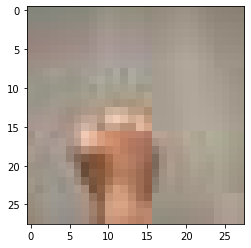

In [174]:
# 한번 이미지를 불러 볼까요?
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [175]:
# 딥러닝 네트워크 설계하기
# 자 이제 데이터의 준비가 끝났습니다. 이제 여러분들이 가위바위보를 인식하는 딥러닝 네트워크를 설계해 볼까요?

import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
#뉴런 수 조절 오버피팅 방지
model=keras.models.Sequential()
#레이어마다 뉴런 수 감소 오버피팅 방지
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)               204928    
_________________________________________________________________
dense_25 (Dense)             (None, 3)               

In [176]:
# 딥러닝 네트워크 학습시키기
# 잘 설계가 되었다면, 이제 학습을 시켜봅시다. 아마도 여러분들의 데이터는 거의 비슷비슷할 것이기 때문에 accuracy가 꽤 높게 나올 것입니다.

# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.
# 딥러닝 모델을 학습시킵니다.
# 입력이미지의 크기에 채널 추가

model.compile(optimizer='Adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(x_train_norm, y_train, epochs=10, validation_data=(x_val_norm, y_val))


Epoch 1/10
8/8 [==============================] - 1s 59ms/step - loss: 1.1793 - accuracy: 0.4333 - val_loss: 1.0685 - val_accuracy: 0.3833
Epoch 2/10
8/8 [==============================] - 0s 39ms/step - loss: 1.0638 - accuracy: 0.3833 - val_loss: 1.0315 - val_accuracy: 1.0000
Epoch 3/10
8/8 [==============================] - 0s 37ms/step - loss: 1.0250 - accuracy: 0.6917 - val_loss: 0.9564 - val_accuracy: 1.0000
Epoch 4/10
8/8 [==============================] - 0s 37ms/step - loss: 0.9290 - accuracy: 0.8667 - val_loss: 0.8661 - val_accuracy: 1.0000
Epoch 5/10
8/8 [==============================] - 0s 42ms/step - loss: 0.7886 - accuracy: 1.0000 - val_loss: 0.6699 - val_accuracy: 1.0000
Epoch 6/10
8/8 [==============================] - 0s 47ms/step - loss: 0.5730 - accuracy: 1.0000 - val_loss: 0.4179 - val_accuracy: 1.0000
Epoch 7/10
8/8 [==============================] - 0s 45ms/step - loss: 0.3177 - accuracy: 1.0000 - val_loss: 0.1891 - val_accuracy: 1.0000
Epoch 8/10
8/8 [===========

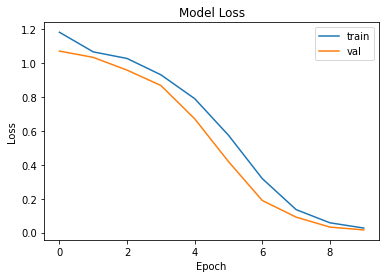

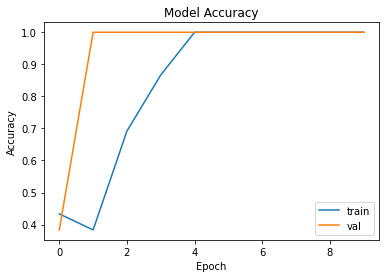

In [177]:
# 시각화

# 훈련 손실 그래프
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

# 훈련 정확도 그래프
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

In [178]:
# 얼마나 잘 만들었는지 확인하기(테스트)
# 여러분들은 300장의 가위바위보 이미지를 만들어 모두 학습에 사용했습니다. 그러므로 테스트 데이터가 없죠. 옆 친구의 이미지 데이터 300장을 받아오세요. 
# 그리고 그것을 테스트 데이터로 하여 test accuracy를 측정해보세요. 
# (만약 웹캠이 없는 경우 섹션을 진행하신 경우, 이미 test 데이터셋이 준비돼있으니 친구에게 조르지 않으셔도 됩니다)

# test 디렉토리를 생성해서, 친구에게 받은 데이터를 업로드해보세요.
# $ mkdir -p ~/aiffel/rock_scissor_paper/test

# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
# 테스트용 데이터를 준비합니다.

# scissor
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

# rock
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

# paper
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")


# 우선 테스트용 데이터인 x_test, y_test를 만들어 봅시다.

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!
100  images to be resized.
100  images resized.
바위 이미지 resize 완료!
100  images to be resized.
100  images resized.
보 이미지 resize 완료!
학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [179]:
# 테스트용 데이터가 준비되었으니, 위에서 훈련시킨 model을 사용하여 test_accuracy를 측정해 봅시다.

# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.evaluate()을 사용해 봅시다.

test_loss, test_accuracy = model.evaluate(x_test_norm,y_test,verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 3.5149 - accuracy: 0.2833
test_loss: 3.514869451522827
test_accuracy: 0.28333333134651184


In [180]:
# model이 추론한 확률값. 
predicted_result = model.predict(x_test_norm)
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [9.5876297e-03 5.0771015e-04 9.8990470e-01]
model이 추론한 가장 가능성이 높은 결과 :  2
실제 데이터의 라벨 :  0


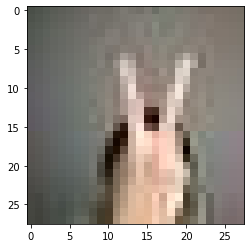

In [181]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [0.01266423 0.00197888 0.98535687]
라벨: 0, 예측결과: 2


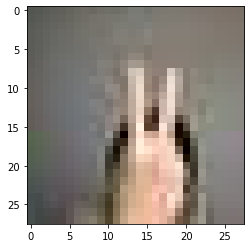

예측확률분포: [0.29532474 0.1780879  0.52658737]
라벨: 1, 예측결과: 2


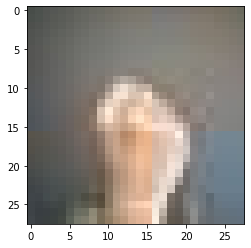

예측확률분포: [0.11779732 0.00633757 0.87586516]
라벨: 0, 예측결과: 2


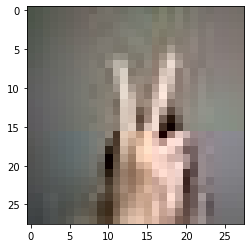

예측확률분포: [0.39937812 0.05524967 0.5453722 ]
라벨: 1, 예측결과: 2


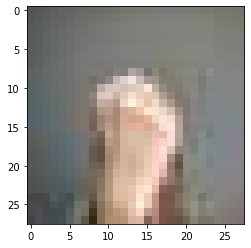

예측확률분포: [0.0202565  0.02215084 0.9575926 ]
라벨: 1, 예측결과: 2


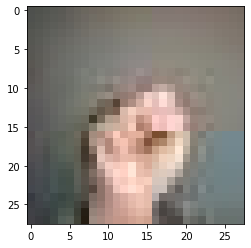

In [165]:
# 더 좋은 네트워크 만들어보기
# 시험용 데이터x_test에 대한 인식률 test accuracy가 train accuracy보다 많이 낮게 나오지는 않았나요? 
# 만약 그렇다면 그 이유는 무엇일까요? 
# MNIST 손글씨 데이터 때처럼 test accuracy가 train accuracy에 근접하도록 개선 방법을 찾아 봅시다.

import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

# 노드를 마치며...
# 여러분 미니 프로젝트는 잘 마치셨나요? 여러분은 이번 노드를 통해 다음의 내용을 배웠습니다.

# 이미 잘 정제된 10개 클래스의 숫자 손글씨 데이터를 분류하는 classifier 만들기
# 정제되지 않은 웹캠 사진으로부터 데이터 만들어보기
# 흑백 사진이 아닌 컬러 사진을 학습하는 classifier 만들기
# 분류하고자 하는 클래스의 개수를 마음대로 조절하기 (10개에서 3개로)